Part One - Retreiving and Analysing mRNA and Protein Sequences of Human Cadherin-7 (25 marks)


- Task 1 - Search NCBI for the human Cadherin-7 gene entry, how many alternate transcripts does it have, what are their official accession ids, and how long are they in nucleotides (5 marks)

- Task 2 - Calculate the percentage composition of A, C, G, and T for each transcript and report the results in a table with the transcripts as rows and the percentages for each nucleotide as columns (5 marks)

- Task 3 - Translate the transcript sequences into protein sequences, report the length of the resulting proteins and state the most frequent amino acid in each one, if there are joint frequent ones name them all (5 marks)


- up to 6 marks for including one additional piece of analysis.

- up to 4 marks for exceptionally well organised and executed approach.


Possible extensions here might be to:

- look at other human Cadherin genes to see whether they also use alternate splicing to create different isoforms

- compare human Cadherin-7 to orthologs in other species

- write a short summary of what Cadherins do

- look at the structure of the Cadherin protein family

- comment on the difference in structure between the different Cadherin-7 isoforms

# Task 1

not gonna write code for this one I don't think!

Searching up "Homo Sapiens Cadherin-7" in Genes database, clicking through to "NCBI reference sequences" then tried the new "Transcript table" function which was super clear and helpful as it already included the length in nucleotides!

4 alternate transcripts (accession number : length (nt)):
- NM_004361.5 : 12136
- NM_033646.4 : 12126
- NM_001317214.3 : 3407
- NM_001362438.2 : 12938

In [61]:
import numpy as np
import pandas as pd
from Bio import Entrez
Entrez.email = "s2055618@ed.ac.uk"
from Bio import SeqIO
from matplotlib import pyplot as plt

In [62]:
# TASK 2


"""_Methodology_:
Using the accession number obtained in task 1, I fetch each entry matching the acession ID's fromt he nucleotide DB, then read then genbank format.
I then extract the sequence from this entry using location info provided by the gene feature (location for this is just the whole sequence).
I then count the numbers of A,C,G,T and divide each by the sequence length (also provided by the genbank record) to get a fraction that they make up.
I then print this out (along with ID and Sequence_length), to be recorded in a table in my report document.
"""


accession_numbers = ["NM_004361.5", "NM_033646.4", "NM_001317214.3", "NM_001362438.2"]

for i in range(len(accession_numbers)):
    handle = Entrez.efetch(db="nucleotide", id=accession_numbers[i], rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    
    if record.features:
        for feature in record.features:
            # type=cds == coding sequence, however we want the whole thing! or do I? (so using the gene feature)
            if feature.type == "gene":
                current_sequence = feature.location.extract(record).seq
                print('ID:', accession_numbers[i])
                print(current_sequence)
                seq_len = len(current_sequence)
                a_count = current_sequence.count('A')
                c_count = current_sequence.count('C')
                g_count = current_sequence.count('G')
                t_count = current_sequence.count('T')
                # printing the sequence length is just for peace of mind :)
                print("nt sequence length:", seq_len)
                print("A's:", a_count, "C's:", c_count, "G's:", g_count, "T's:", t_count)
                a_pct = (a_count / seq_len) * 100
                c_pct = (c_count / seq_len) * 100
                g_pct = (g_count / seq_len) * 100
                t_pct = (t_count / seq_len) * 100
                print("%A =", a_pct, "| %C =", c_pct, "| %G =", g_pct, "| %T =", t_pct, "\n")
            

ID: NM_004361.5
AGTCTGCCCCGCGCGCGGAGCTGCGCGCACTGGGTCCCCAAGAGCCCGCGGGCGTCCGGCAGCCGAGCGCACGTTCTTTCGGATGCACACGCCCGGGTCCCTGGCGTCTGACGCCGTGGGGAGGGCAGCGAGGCCCCAGGTACTTACTACACCATTCTTTGGCGAAGGCTATTCAGCAGTGGTGACCTCTTCCAATCCAACACTCTACAGATTATTATCTCTGGACTCCCAGCTGACACCCTGCCGGAGGCAAGAGCTACTAAGCCAACTGGAACTGTGCCTTTTCTCTTGTCAAGGTTTTTTTCTTACACAGGAAAAAGAAAGAAAAAAAAAAGATGAAGTTGGGCAAAGTGGAGTTCTGCCATTTTCTGCAGCTAATAGCTCTTTTCCTGTGTTTTTCTGGGATGAGTCAAGCAGAACTCTCAAGGTCCAGATCAAAGCCCTATTTCCAATCAGGGAGGTCCCGGACCAAGCGCAGCTGGGTGTGGAATCAGTTCTTTGTGCTGGAGGAATACATGGGTTCAGACCCCCTCTATGTAGGAAAGCTTCACTCTGATGTTGATAAAGGAGATGGTTCCATCAAATACATCTTGTCAGGCGAAGGGGCAAGTTCCATTTTCATTATTGATGAGAACACTGGGGATATTCATGCCACCAAGAGACTGGATCGTGAGGAGCAGGCCTACTACACGCTCCGAGCTCAAGCGCTGGATAGGCTCACCAACAAACCCGTGGAGCCCGAGTCGGAGTTTGTCATCAAAATTCAGGATATCAACGACAATGAACCCAAATTTTTGGATGGCCCATACACGGCAGGAGTTCCCGAAATGTCTCCCGTGGGGACCTCAGTGGTACAAGTGACAGCGACGGATGCTGATGATCCTACATATGGCAACAGTGCCAGAGTGGTCTACAGTATTCTGCAAGGACAGCCGTACTTCTCAGTGGAGCCAAAGACAGGAGTCATCAAGACTGCCCTTCCAA

In [63]:
# Task 3

# method fairly straightforward, as it's very similar to the previous one except I translate the nt sequences into protein sequences!
# except i impl. a really awesome count_amino_acids function thats actually efficient bc im the GOAT (ok so its not that efficient with the sort there...)
# ran into trouble with getting lots of asterisks in my sequence, on further research it looks like if my protein contains these asterisks then the translation
# may not be accurate, so going forward I will try to get the FASTA format rather than genbank

# solved all my problems, instead of translating the whole gene just translating the coding sequence.

accession_numbers = ["NM_004361.5", "NM_033646.4", "NM_001317214.3", "NM_001362438.2"]

# NOTE: GETTING A WARNING WHEN TRANSLATING THE FIRST TRANSCRIPTION AS IT IS NOT A  MULTIPLE OF THREE
# POSSIBLE TODO: ADD PADDING TO END OF SEQUENCE
# RESOLUTION: NO LONGER GETTING THIS PROBLEM AS ONLY TRANSLATING THE CODING SEQUENCE

# NOTE: THERE ARE ATERISKS APPEARING IN MY PROTEIN SEQUENCE
# RESOLUTION1: OK, ASTERISK (STOP CODON) MEANS END OF A PROTEIN? SO NOW COUNTING AMINO ACIDS FOR EACH - THINK THIS COULD BE WRONG THOUGH
# FINAL RESOLUTION: ONLY TRANSLATING CODEING SEQUENCE, NOW ONLY HAVE ONE PROTEIN :)

def count_amino_acids(protein_seq):
    aa_counts = {}
    for i in range(len(protein_seq)):
        curr_amino_acid = protein_seq[i]
        if curr_amino_acid in aa_counts:
            aa_counts[curr_amino_acid] += 1
        else:
            aa_counts.update({curr_amino_acid : 1})
    # return the amino acid counts dictionary sorted by value (note: the - (negative) sign before the value (item[1]) sorts in desc order)
    return {k: v for k, v in sorted(aa_counts.items(), key=lambda item: -item[1])}

for i in range(len(accession_numbers)):
    handle = Entrez.efetch(db="nucleotide", id=accession_numbers[i], rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    
    if record.features:
        for feature in record.features:
            # type=cds == coding sequence
            if feature.type == "CDS":
                current_sequence = feature.location.extract(record).seq
                print('ID:', accession_numbers[i])
                current_protein_sequence = current_sequence.translate()
                print(current_protein_sequence)
                print("protein sequence length (incl. stop codon):", len(current_protein_sequence))
                # this split is kind of not needed as I just need to remove an asterisk at the end of the sequence, just left over from a previous code version
                current_proteins_list = current_protein_sequence.split('*')
                for p in current_proteins_list:
                    p_length = len(p)
                    if p_length != 0:
                        aa_count = count_amino_acids(p)
                        print(aa_count)
                        print("protein length =", p_length, ", top amino acid =", list(aa_count)[0], "\n")
                
                




ID: NM_004361.5
MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWVWNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDENTGDIHATKRLDREEQAYYTLRAQALDRLTNKPVEPESEFVIKIQDINDNEPKFLDGPYTAGVPEMSPVGTSVVQVTATDADDPTYGNSARVVYSILQGQPYFSVEPKTGVIKTALPNMDREAKDQYLLVIQAKDMVGQNGGLSGTTSVTVTLTDVNDNPPRFPRRSYQYNVPESLPVASVVARIKAADADIGANAEMEYKIVDGDGLGIFKISVDKETQEGIITIQKELDFEAKTSYTLRIEAANKDADPRFLSLGPFSDTTTVKIIVEDVDEPPVFSSPLYPMEVSEATQVGNIIGTVAAHDPDSSNSPVRYSIDRNTDLERYFNIDANSGVITTAKSLDRETNAIHNITVLAMESQNPSQVGRGYVAITILDINDNAPEFAMDYETTVCENAQPGQVIQKISAVDKDEPSNGHQFYFSLTTDATNNHNFSLKDNKDNTASILTRRNGFRRQEQSVYYLPIFIVDSGSPSLSSTNTLTIRVCDCDADGVAQTCNAEAYVLPAGLSTGALIAILACVLTLLVLILLIVTMRRRKKEPLIFDEERDIRENIVRYDDEGGGEEDTEAFDMAALRNLNVIRDTKTRRDVTPEIQFLSRPAFKSIPDNVIFREFIWERLKEADVDPGAPPYDSLQTYAFEGNGSVAESLSSLDSISSNSDQNYDYLSDWGPRFKRLADMYGTGQESLYS*
protein sequence length (incl. stop codon): 786
{'S': 66, 'D': 65, 'L': 59, 'V': 56, 'A': 56, 'I': 53, 'T': 52, 'E': 51, 'G': 47, 'R': 42, 'P': 40, 'N': 40, 'K': 34, 'F': 32, 'Y': 31, 'Q': 30, 'M':

In [64]:
# TODO: plot a bar graph of amino acid distribution
# 2 graphs: abs and percent?


accession_numbers = ["NM_004361.5", "NM_033646.4", "NM_001317214.3", "NM_001362438.2"]

def count_amino_acids(protein_seq):
    aa_counts = {}
    for i in range(len(protein_seq)):
        curr_amino_acid = protein_seq[i]
        if curr_amino_acid in aa_counts:
            aa_counts[curr_amino_acid] += 1
        else:
            aa_counts.update({curr_amino_acid : 1})
    # return the amino acid counts dictionary sorted by keys in ascending order
    return {k: v for k, v in sorted(aa_counts.items(), key=lambda item: item[0])}

all_keys = []
all_vals = []
    
for i in range(len(accession_numbers)):
    handle = Entrez.efetch(db="nucleotide", id=accession_numbers[i], rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    
    if record.features:
        for feature in record.features:
            if feature.type == "CDS":
                current_sequence = feature.location.extract(record).seq
                current_protein_sequence = current_sequence.translate()
                # remove stop codon from sequence
                current_protein_sequence = current_protein_sequence[:-1]
                aa_count = count_amino_acids(current_protein_sequence)
                keys = list(map(lambda x: x[0], aa_count.items()))
                vals = list(map(lambda x: x[1], aa_count.items()))
                all_keys.append(keys)
                all_vals.append(vals)
                
print(all_keys)
print(all_vals)

                

[['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']]
[[56, 7, 65, 51, 32, 47, 7, 53, 34, 59, 13, 40, 40, 30, 42, 66, 52, 56, 4, 31], [56, 7, 65, 51, 32, 47, 7, 53, 34, 59, 13, 40, 40, 30, 42, 66, 52, 56, 4, 31], [47, 8, 48, 36, 25, 40, 7, 42, 28, 47, 10, 33, 32, 27, 28, 52, 45, 48, 2, 25], [56, 7, 65, 51, 32, 47, 7, 53, 34, 59, 13, 40, 40, 30, 42, 66, 52, 56, 4, 31]]


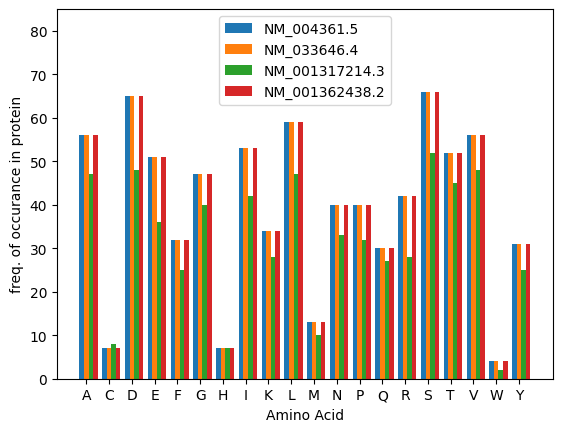

In [77]:
plt.xlabel("Amino Acid")
plt.ylabel("freq. of occurance in protein")

# widths = [-0.4,-0.2,0.4,0.2]
# for i in range(4):
#     plt.bar(all_keys[i], all_vals[i], widths[i], align='edge')
    
offsets = [-0.2, 0, 0.2, 0.4]
x=np.arange(len(all_keys[i]))
for i in range(4):
    plt.bar(x+offsets[i], all_vals[i], 0.2)

ax = plt.gca()
ax.set_ylim([0, 85])

plt.xticks(x, all_keys[0])
plt.legend(accession_numbers)
plt.show()

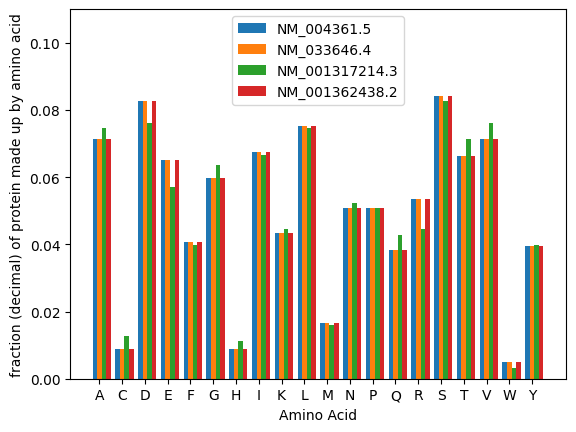

In [82]:
# todo: fix bars, they look ugly


plt.xlabel("Amino Acid")
plt.ylabel("fraction (decimal) of protein made up by amino acid")

sums = list(map(lambda xs: sum(xs), all_vals))
frac_vals = []
for i in range(4):
    frac_vals.append(list(map(lambda x: x / sums[i], all_vals[i])))

offsets = [-0.2, 0, 0.2, 0.4]
x=np.arange(len(all_keys[i]))
for i in range(4):
    plt.bar(x+offsets[i], frac_vals[i], 0.2)

ax = plt.gca()
ax.set_ylim([0, 0.11])

plt.xticks(x, all_keys[0])
plt.legend(accession_numbers)
plt.show()

# Task 4

possible todo: comment on the structure of different cadherin-7 isoforms

![Alt text](DNA_alternative_splicing.gif)

SEE the NCBI Rerference Sequences Section for some description about the differences between transcripts

Short summary of what Cadherins do...

Cadherins (calcium glue) are important to cell adhesion in animals. Maitre et al. [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3722483/] discusses the 3 functions of cadherins in Cell Adhesion. Two of these function are to increase cell-to-cell contact size, getting a bigger surface area for more "sticking" power. The other is to counteract forces that pull on the contact in order to stablise the adhesion between cells.

To promote contact expansion between cells, Cadherins lower the interfacial tension at the cell to cell contact area. They do this by providing an adhesion tension to attract the cells and by reducing the cortex tension of cells, both of which result in lowering the interfacial tension- or surface tension of cells.

In order to stabalise the connection between cells, Cadherins also regulate forces pulling cells away from each other. They do this by signalling to the actomyosin skeleton that exerts these pulling forces, to ensure the mechanical pulling force is not greater than the force the adhesive bonds can withstand, so they aren't overcome and pulled apart when the cells adhere.

Cadherins are particularly useful in tissue morphogenesis and homostasis. They are useful in morphogenesis, as during morphogenesis, tissues can change size and shape and form distinct layers, they therefore need cadherins to help control the cell shape and cell signalling. [what are these?]. [explain how they are useful in homostasis]

also used https://www.pnas.org/doi/10.1073/pnas.2122030119